In [2]:
# Will reload modules after this when they change!
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Surpress umap warnings
import warnings

# RDkit!
from rdkit.Chem.Descriptors import ExactMolWt as emass
from rdkit.Chem.Crippen import MolLogP as clogp

# My fun-ctions!
from exploratory_data_analysis_II import *

def action_with_warnings():
    warnings.warn("should not appear")

### This script 
This script takes the database dataframe and joins it with observed data frame.  Next, umap distances with Kmeans labels are added for Mordred, Morgan, and MM chemical space.  This df can then be used for exploring relationships in chemical space.

# Loads pickles from previous nb:
http://localhost:8888/notebooks/PycharmProjects/neutral_loss/nl_0_3_clean_join_nb.ipynb
http://localhost:8888/notebooks/PycharmProjects/neutral_loss/Exploratory_data_analysis_exptl_space.ipynb

In [4]:
data_df = pd.read_pickle('high_quality.pickle')
db_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/core_metabolome_out.pickle') # 0.1 Gb
mord_norm_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/mord_norm_df.pickle')  # 0.8 Gb
bits_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/bits_df.pickle')  #0.2 Gb
obs_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/obs_df.pickle')

In [5]:
# Merge db_db and obs_df!
# Rows = db entires, column for each dataset and total obsveratiopns
do_df = db_obs_df_merge(db_df, obs_df, 'exptl', True)

# Add NL observations by polarity and loss-type:
pol = ['positive', 'negative']
losses = ['n_loss_only_H2O', 'n_loss_wparent_H2O', 'n_loss_none_H2O']
do_df = db_df_add_nl(do_df, data_df, pol, losses)

# Human readable columns...
# do_df.iloc[:, np.r_[0:3,-7:0]]

In [9]:
# For LCMS style plotting
do_df['exact'] = do_df['Molecule'].apply(lambda x: emass(x))
do_df['clogp'] = do_df['Molecule'].apply(lambda x: clogp(x))

In [11]:
# Add umap distance from mord, morg, and mm and kmeans cats for each
do_df = add_mord_morg_mm_umap_distance(do_df, mord_norm_df, bits_df, 6)

In [12]:
# Save your work, also new name!
do_df.to_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/db_obs.pickle') 

In [95]:
# Steps above are a little slow.  Only rerun with new db or data.
do_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/db_obs.pickle')

Offline: Examine do_df using chem_scatter.py
"/Users/dis/PycharmProjects/interactive_plots/chem_scatter.py"
At terminal: "python chem_scatter.py"
http://127.0.0.1:8050

# Results:
1. Morgan umap scatter plots seem to rationally group molecules.
2. Mordred umap scatter plots seem to rationally group molecules.
3. Mordred umap scatter plots seem to rationally group molecules.

--> How to evaluate which works best?

9686/114XX observed!

In [93]:
headers = ['hmdb_ids', 'formula', 'Molecule', 'exptl',
           'positive_n_loss_only_H2O', 'negative_n_loss_only_H2O',
           'positive_n_loss_wparent_H2O','negative_n_loss_wparent_H2O',
           'positive_n_loss_none_H2O', 'negative_n_loss_none_H2O',
           'exact', 'clogp',
           'umap_mord_x', 'umap_mord_y', 'umap_mord_cat', 
           'umap_morg_x', 'umap_morg_y', 'umap_morg_cat',
           'umap_mm_x', 'umap_mm_y', 'umap_mm_cat']

In [ ]:
list(do_df)

In [23]:
df = do_df[headers]
df = do_df[do_df.exptl == True]

In [25]:
df.umap_mord_cat.unique()

array([2, 1, 5, 4, 0, 3])

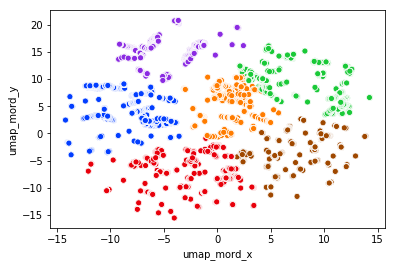

In [57]:
# Mordred descriptor UMAP with Mordred clusters n=6
ax = sns.scatterplot(x='umap_mord_x', y='umap_mord_y', 
                     hue='umap_mord_cat', data=df,
                    palette='bright', legend=False)

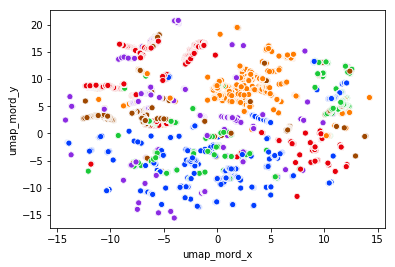

In [33]:
# Mordred descriptor UMAP with Morgan clusters n=6
ax = sns.scatterplot(x='umap_mord_x', y='umap_mord_y', 
                     hue='umap_morg_cat', data=df,
                    palette='bright', legend=False)

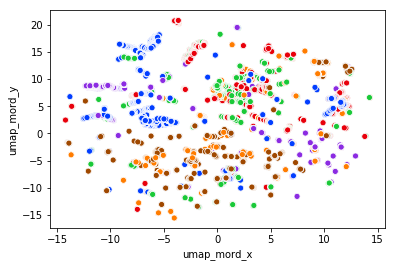

In [34]:
# Mordred descriptor UMAP with M+M clusters n=6
ax = sns.scatterplot(x='umap_mord_x', y='umap_mord_y', 
                     hue='umap_mm_cat', data=df,
                    palette='bright', legend=False)

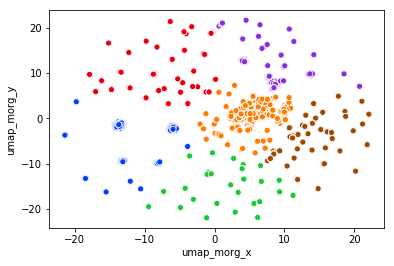

In [35]:
# Morgan descriptor UMAP with Morgan clusters n=6
ax = sns.scatterplot(x='umap_morg_x', y='umap_morg_y', 
                     hue='umap_morg_cat', data=df,
                    palette='bright', legend=False)

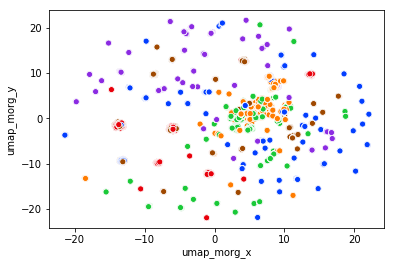

In [36]:
# Morgan descriptor UMAP with Mordred clusters n=6
ax = sns.scatterplot(x='umap_morg_x', y='umap_morg_y', 
                     hue='umap_mord_cat', data=df,
                    palette='bright', legend=False)

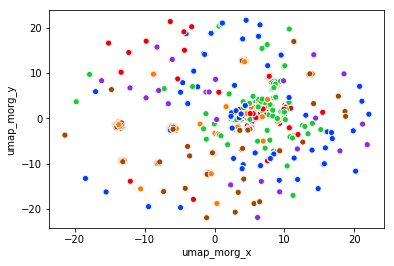

In [37]:
# Morgan descriptor UMAP with M+M clusters n=6
ax = sns.scatterplot(x='umap_morg_x', y='umap_morg_y', 
                     hue='umap_mm_cat', data=df,
                    palette='bright', legend=False)

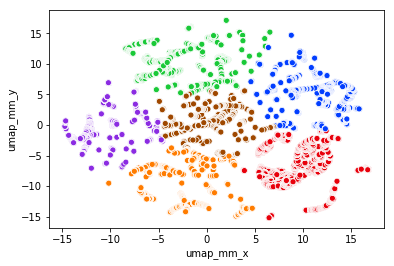

In [58]:
# M+M descriptors with fingerprints with M+M clusters n=6
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='umap_mm_cat', data=df,
                    palette='bright', legend=False)

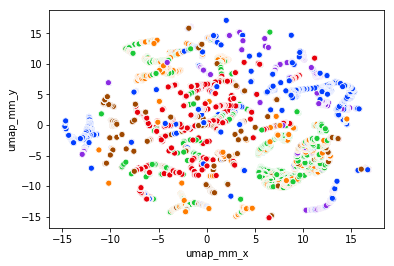

In [39]:
# M+M descriptors with fingerprints with Mord clusters n=6
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='umap_mord_cat', data=df,
                    palette='bright', legend=False)

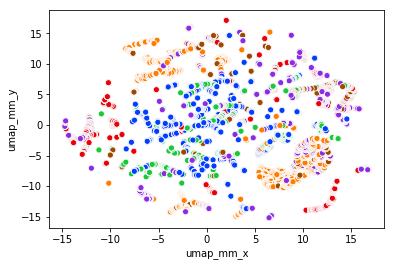

In [40]:
# M+M descriptors with fingerprints with Morgan clusters n=6
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='umap_morg_cat', data=df,
                    palette='bright', legend=False)

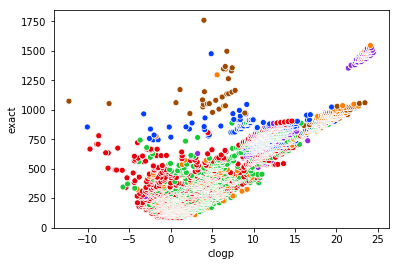

In [60]:
# LCMS polarity vs mz plot with M+M clusters (n=6)
ax = sns.scatterplot(x='clogp', y='exact',  
                     hue='umap_mm_cat', data=df,
                    palette='bright', legend=False)

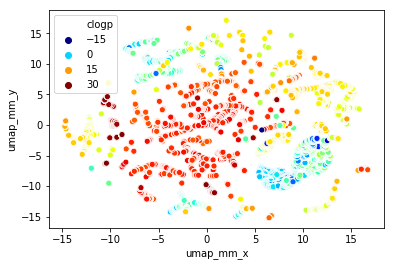

In [61]:
# M+M fingerprins and descriptors with polarity
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='clogp', data=df,
                    palette='jet', legend='brief')

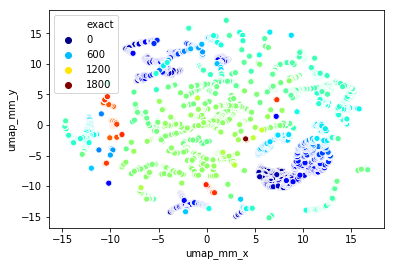

In [56]:
# M+M fingerprins and descriptors with mass
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='exact', data=df,
                    palette='jet', legend='brief')

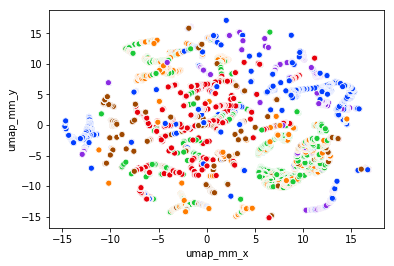

In [39]:
# M+M descriptors with fingerprints with Mord clusters n=6
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='umap_mord_cat', data=df,
                    palette='bright', legend=False)

In [73]:
df2 = df[['umap_mm_x', 'umap_mm_y']]
df3 = df[['positive_n_loss_only_H2O', 'negative_n_loss_only_H2O',
          'positive_n_loss_wparent_H2O','negative_n_loss_wparent_H2O',
          'positive_n_loss_none_H2O', 'negative_n_loss_none_H2O']].astype(bool).astype(int)
df2 = pd.concat([df2, df3], axis=1)

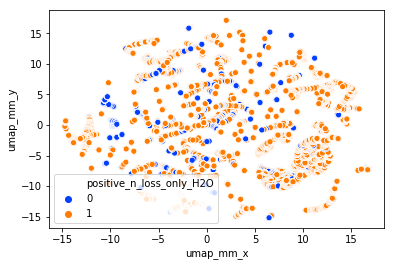

In [76]:
# M+M descriptors and fingerprints with + n_loss only
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='positive_n_loss_only_H2O', data=df2,
                    palette='bright', legend='brief')

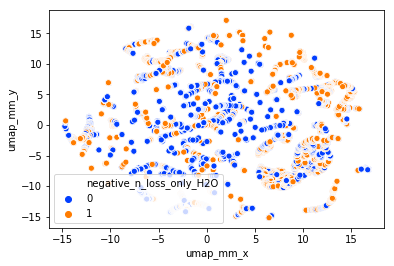

In [77]:
# M+M descriptors and fingerprints with - n_loss only
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='negative_n_loss_only_H2O', data=df2,
                    palette='bright', legend='brief')

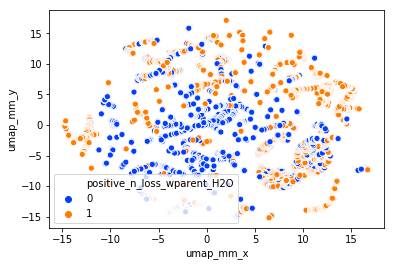

In [78]:
# M+M descriptors and fingerprints with + n_loss_wparent
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='positive_n_loss_wparent_H2O', data=df2,
                    palette='bright', legend='brief')

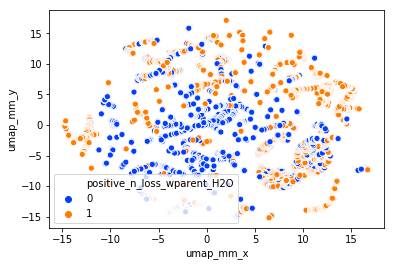

In [78]:
# M+M descriptors and fingerprints with - n_loss_wparent
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='negative_n_loss_wparent_H2O', data=df2,
                    palette='bright', legend='brief')

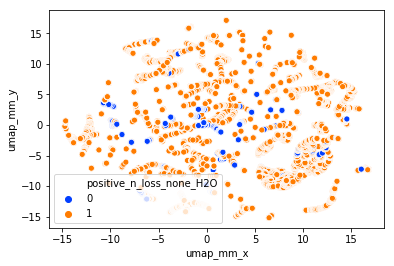

In [79]:
# M+M descriptors and fingerprints with + n_loss_none
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='positive_n_loss_none_H2O', data=df2,
                    palette='bright', legend='brief')

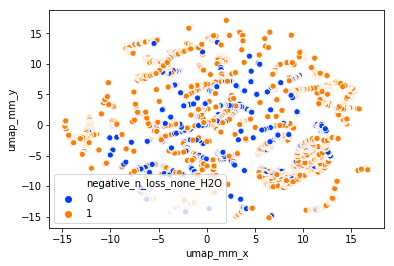

In [80]:
# M+M descriptors and fingerprints with - n_loss_wparent
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='negative_n_loss_none_H2O', data=df2,
                    palette='bright', legend='brief')

Most molecules are observed as +/- and all/with/none, indicating different behavior over many datasets?  What about observations of same compounds with different polarity?

In [60]:
# Make a df just of datasets versus compound ids
df1 = do_df.set_index('hmdb_ids')
df1 = df1.iloc[:,5:-7]
df1 = df1.fillna(0)

In [61]:
# Make a df of datasets versus polarity
df2 = data_df[['ds_id', 'polarity']]
df2 = df2.groupby('ds_id').agg('first')
pos_list = list(df2[df2.polarity == "positive"].reset_index().ds_id)
neg_list = list(df2[df2.polarity == "negative"].reset_index().ds_id)

In [83]:
def which_pol_obsd(pos, neg):
    # 0 not observed, -1 negative mode, 1 positive mode, 2 both
    if pos == 0 and neg == 0:
        return 0
    elif pos == 0:
        return -1
    elif neg == 0:
        return 1
    else:
        return 2

In [91]:
# Make a df of compound ids versus polarity
df3 = df1[pos_list].sum(axis=1)
df4 = df1[neg_list].sum(axis=1)
df5 = pd.concat([df3, df4], axis=1)
df5 = df5.rename(columns={0: 'n_positive', 1: 'n_negative'})
df5
df5['none_neg_pos_both'] = df5.apply((lambda x: which_pol_obsd(x.n_positive,
                                                              x.n_negative)), axis=1)
df5.to_pickle('/Users/dis/PycharmProjects/neutral_loss/databases/ids_vs_polarity_obd.pickle')
ids_polarity = df5

In [98]:
# Join DO obsd df with umap coordinates to ids_polarity for later plotting
headers = ['hmdb_ids', 'formula', 'Molecule', 'exptl',
           'positive_n_loss_only_H2O', 'negative_n_loss_only_H2O',
           'positive_n_loss_wparent_H2O','negative_n_loss_wparent_H2O',
           'positive_n_loss_none_H2O', 'negative_n_loss_none_H2O',
           'exact', 'clogp',
           'umap_mord_x', 'umap_mord_y', 'umap_mord_cat', 
           'umap_morg_x', 'umap_morg_y', 'umap_morg_cat',
           'umap_mm_x', 'umap_mm_y', 'umap_mm_cat']
df = do_df[headers]
df = df.set_index('hmdb_ids')
df = df.join(ids_polarity)

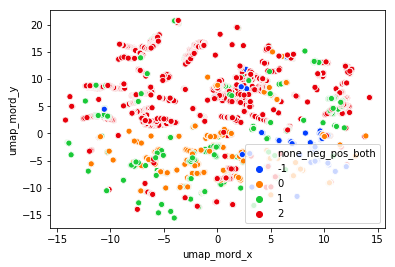

In [101]:
# Mordred descriptor UMAP with polarity obsd
ax = sns.scatterplot(x='umap_mord_x', y='umap_mord_y', 
                     hue='none_neg_pos_both', data=df,
                    palette='bright', legend='brief')

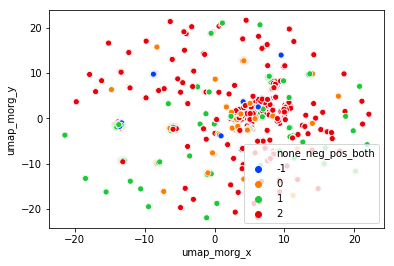

In [102]:
# Morgan descriptor UMAP with polarity obsd
ax = sns.scatterplot(x='umap_morg_x', y='umap_morg_y', 
                     hue='none_neg_pos_both', data=df,
                    palette='bright', legend='brief')

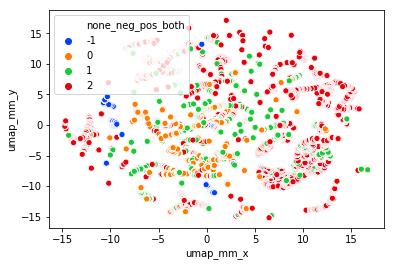

In [103]:
# M+M descriptors and fingerprints with with polarity obsd
ax = sns.scatterplot(x='umap_mm_x', y='umap_mm_y', 
                     hue='none_neg_pos_both', data=df,
                    palette='bright', legend='brief')

In [ ]:
# For actual model building pass forward do_df d data_df!

To do:
1. Plot chemical space pos/neg/both
2. Run steps 1-2 
3. Build regression models (3)
4. Build classifiers (3)